In [ ]:
!nvidia-smi


Sun Mar 23 05:34:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/CAPSTONE_DATASETS'


ALL_DOWN_SYNDROME_IMAGES  Autism_Images  Deletion_syndrome  GMDB  TEXTUAL_DATA	TRAIN1


shreyas


In [ ]:
#hi

In [ ]:
folder_path = '/content/drive/MyDrive/CAPSTONE_DATASETS/ALL_DOWN_SYNDROME/downSyndrome/downSyndrome'

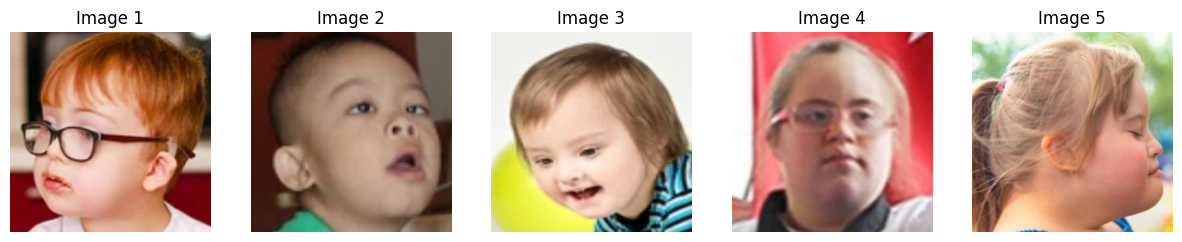

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Folder path
folder_path = '/content/drive/MyDrive/CAPSTONE_DATASETS/ALL_DOWN_SYNDROME_IMAGES/DOWN_SYNDROME_KAGGLE/downSyndrome/downSyndrome'

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('png', 'jpg', 'jpeg'))]

# Display the first 5 images
plt.figure(figsize=(15, 15))  # Set the figure size to display the images properly

# Loop through the first 5 images
for i, img_file in enumerate(image_files[:5]):
    img_path = os.path.join(folder_path, img_file)  # Get the full path of the image
    img = mpimg.imread(img_path)  # Read the image
    plt.subplot(1, 5, i+1)  # Set the subplot for the images
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Hide the axis to just show the image
    plt.title(f'Image {i+1}')  # Optionally add a title to each image

plt.show()  # Show the images


In [ ]:
!ls '/content/drive/MyDrive/CAPSTONE_DATASETS'

ALL_DOWN_SYNDROME_IMAGES  Autism_Images  Deletion_syndrome  GMDB  TEXTUAL_DATA


In [ ]:
!ls '/content/drive/MyDrive/CAPSTONE_DATASETS/ALL_DOWN_SYNDROME_IMAGES'

 DOWN_2   DOWN_SYNDROME_KAGGLE	 Down_syndrome_kaggle2	'down syndrome.v1i.darknet'


In [ ]:
!ls '/content/drive/MyDrive/CAPSTONE_DATASETS/ALL_DOWN_SYNDROME_IMAGES/DOWN_SYNDROME_KAGGLE'

downSyndorme  healty  labeling.xlsx


In [ ]:
import os

# List the parent folder to check if the path exists
folder_path = '/content/drive/MyDrive/CAPSTONE_DATASETS/ALL_DOWN_SYNDROME_IMAGES/DOWN_SYNDROME_KAGGLE/downSyndrome/downSyndrome'
parent_dir = os.path.dirname(folder_path)
print("Parent Directory Contents:", os.listdir(parent_dir))


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CAPSTONE_DATASETS/ALL_DOWN_SYNDROME_IMAGES/DOWN_SYNDROME_KAGGLE/downSyndrome'

In [ ]:
!pip install dlib
!pip install opencv-python

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2  # Unzip the file

--2025-03-23 05:36:12--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-03-23 05:36:13--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  32.5MB/s    in 1.9s    

2025-03-23 05:36:15 (32.5 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
import os
import cv2
import dlib
import numpy as np

# Load face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Download from dlib website

# Function to calculate head pose
def estimate_head_pose(image, landmarks):
    image_points = np.array([
        (landmarks.part(30).x, landmarks.part(30).y),  # Nose tip
        (landmarks.part(8).x, landmarks.part(8).y),    # Chin
        (landmarks.part(36).x, landmarks.part(36).y),  # Left eye left corner
        (landmarks.part(45).x, landmarks.part(45).y),  # Right eye right corner
        (landmarks.part(48).x, landmarks.part(48).y),  # Left Mouth corner
        (landmarks.part(54).x, landmarks.part(54).y)   # Right mouth corner
    ], dtype="double")

    # 3D model points based on a generic face model
    model_points = np.array([
        (0.0, 0.0, 0.0),        # Nose tip
        (0.0, -330.0, -65.0),   # Chin
        (-225.0, 170.0, -135.0), # Left eye left corner
        (225.0, 170.0, -135.0),  # Right eye right corner
        (-150.0, -150.0, -125.0), # Left mouth corner
        (150.0, -150.0, -125.0)  # Right mouth corner
    ], dtype="double")

    # Camera matrix approximation
    focal_length = image.shape[1]
    center = (image.shape[1]//2, image.shape[0]//2)
    camera_matrix = np.array([
        [focal_length, 0, center[0]],
        [0, focal_length, center[1]],
        [0, 0, 1]
    ], dtype="double")

    dist_coeffs = np.zeros((4, 1))  # Assuming no lens distortion
    _, rotation_vector, _ = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs)

    # Convert rotation vector to rotation matrix
    rotation_matrix, _ = cv2.Rodrigues(rotation_vector)

    # Extract yaw angle (left/right rotation)
    yaw = np.degrees(np.arctan2(rotation_matrix[1][0], rotation_matrix[0][0]))

    return yaw

# Process dataset
dataset_path = "/content/drive/MyDrive/CAPSTONE_DATASETS/ALL_DOWN_SYNDROME_IMAGES/DOWN_SYNDROME_KAGGLE/downSyndrome/downSyndrome"
output_path = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/healthy2"
os.makedirs(output_path, exist_ok=True)

for filename in os.listdir(dataset_path):
    if filename.endswith((".jpg", ".png")):
        image_path = os.path.join(dataset_path, filename)
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        faces = detector(gray)
        for face in faces:
            landmarks = predictor(gray, face)
            yaw = estimate_head_pose(image, landmarks)

            if abs(yaw) < 10:  # Threshold for straight faces
                cv2.imwrite(os.path.join(output_path, filename), image)

print("Filtering complete. Check:", output_path)

RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

end


In [ ]:
# Sampreet

In [ ]:
import os
import cv2

# Set the paths for your dataset and output
dataset_path = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/healthy"
output_path = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/HEALTHY_GRAY_IMAGES"
os.makedirs(output_path, exist_ok=True)

# Function to convert image to grayscale
def convert_to_grayscale(image_path, output_path, filename):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Save the grayscale image to the output directory
    output_image_path = os.path.join(output_path, filename)
    cv2.imwrite(output_image_path, gray_image)

# Process all images in the dataset
for filename in os.listdir(dataset_path):
    if filename.endswith((".jpg", ".png")):
        image_path = os.path.join(dataset_path, filename)
        convert_to_grayscale(image_path, output_path, filename)

print("Grayscale conversion complete. Check:", output_path)


Grayscale conversion complete. Check: /content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/HEALTHY_GRAY_IMAGES


In [ ]:
pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!ls '/content/drive/MyDrive/CAPSTONE_DATASETS'

ALL_DOWN_SYNDROME_IMAGES  Autism_Images  Deletion_syndrome  GMDB  TEXTUAL_DATA


In [ ]:
dataset_path = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/GRAY_IMAGES"
if os.path.exists(dataset_path):
    print("Dataset directory exists.")
    print("Subfolders in dataset directory:")
    print(os.listdir(dataset_path))  # List the subdirectories
else:
    print("Dataset directory does not exist!")

Dataset directory exists.
Subfolders in dataset directory:
['down_1424.jpg', 'down_146.jpg', 'down_1518.jpg', 'down_1448.jpg', 'down_1450.jpg', 'down_1479.jpg', 'down_1488.jpg', 'down_151.jpg', 'down_1425.jpg', 'down_1489.jpg', 'down_1422.jpg', 'down_1524.jpg', 'down_1438.jpg', 'down_148.jpg', 'down_142.jpg', 'down_1508.jpg', 'down_147.jpg', 'down_1483.jpg', 'down_1490.jpg', 'down_1513.jpg', 'down_1476.jpg', 'down_1523.jpg', 'down_1487.jpg', 'down_1484.jpg', 'down_1470.jpg', 'down_150.jpg', 'down_1440.jpg', 'down_1506.jpg', 'down_1426.jpg', 'down_1419.jpg', 'down_1485.jpg', 'down_1467.jpg', 'down_1429.jpg', 'down_149.jpg', 'down_1435.jpg', 'down_1497.jpg', 'down_1431.jpg', 'down_1501.jpg', 'down_1446.jpg', 'down_230.jpg', 'down_215.jpg', 'down_20.jpg', 'down_1527.jpg', 'down_156.jpg', 'down_239.jpg', 'down_162.jpg', 'down_26.jpg', 'down_195.jpg', 'down_196.jpg', 'down_251.jpg', 'down_174.jpg', 'down_172.jpg', 'down_170.jpg', 'down_161.jpg', 'down_160.jpg', 'down_245.jpg', 'down_1525.jp

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define custom Dataset class to load images
class GrayscaleDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")  # Convert to grayscale
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Set image transformations (resize, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to match ResNet input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalizing grayscale image
])

# Load the dataset
dataset_path = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/GRAY_IMAGES"
labels = []  # List to hold the labels
image_paths = []  # List to hold the image paths

# Assuming the dataset is organized with subfolders for each class
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        for filename in os.listdir(class_folder):
            if filename.endswith((".jpg", ".png")):
                image_paths.append(os.path.join(class_folder, filename))
                labels.append(class_name)  # Assuming class_name as label

# Encode labels as integers
label_to_idx = {label: idx for idx, label in enumerate(sorted(set(labels)))}
labels = [label_to_idx[label] for label in labels]

# Split the dataset into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = GrayscaleDataset(train_paths, train_labels, transform=transform)
val_dataset = GrayscaleDataset(val_paths, val_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load a pre-trained ResNet model
resnet = models.resnet18(pretrained=True)

# Modify the first convolution layer to accept single-channel (grayscale) images
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Modify the final fully connected layer to match the number of classes
num_classes = len(label_to_idx)  # Number of unique classes
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

# Move model to the device (GPU if available)
resnet.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

# Training loop
num_epochs = 10

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_val_accuracy = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Optimizer step

            # Track training metrics
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

        # Validation step
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        print(f"Validation Accuracy: {val_accuracy:.2f}%")

        # Save the best model based on validation accuracy
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), "best_resnet_model.pth")
            print("Model saved!")

# Train the model
train_model(resnet, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)



ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define custom Dataset class to load images
class GrayscaleDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")  # Convert to grayscale
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Set image transformations (resize, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to match ResNet input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalizing grayscale image
])

# Load the dataset
dataset_path = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/GRAY_IMAGES"
labels = []  # List to hold the labels
image_paths = []  # List to hold the image paths

# Assuming the dataset is flat (not in subfolders)
for filename in os.listdir(dataset_path):
    if filename.endswith((".jpg", ".png")):
        image_paths.append(os.path.join(dataset_path, filename))
        labels.append(0)  # For now, assign label 0 (or change if you have multiple classes)

# Check if the dataset has been populated
print(f"Total image paths found: {len(image_paths)}")
print(f"Total labels found: {len(labels)}")

# Split the dataset into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = GrayscaleDataset(train_paths, train_labels, transform=transform)
val_dataset = GrayscaleDataset(val_paths, val_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load a pre-trained ResNet model
resnet = models.resnet18(pretrained=True)

# Modify the first convolution layer to accept single-channel (grayscale) images
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Modify the final fully connected layer to match the number of classes
num_classes = len(set(labels))  # Number of unique classes
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

# Move model to the device (GPU if available)
resnet.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

# Training loop
num_epochs = 10

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_val_accuracy = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Optimizer step

            # Track training metrics
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

        # Validation step
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        print(f"Validation Accuracy: {val_accuracy:.2f}%")

        # Save the best model based on validation accuracy
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), "best_resnet_model.pth")
            print("Model saved!")

# Train the model
train_model(resnet, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)


Total image paths found: 765
Total labels found: 765


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 164MB/s]


Epoch [1/10], Loss: 0.0000, Accuracy: 100.00%
Validation Accuracy: 100.00%
Model saved!


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define custom Dataset class to load images
class GrayscaleDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")  # Convert to grayscale
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Set image transformations (resize, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to match ResNet input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalizing grayscale image
])

# Load the dataset paths and labels
dataset_path_down = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/GRAY_IMAGES"
dataset_path_healthy = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/HEALTHY_GRAY_IMAGES"
image_paths = []  # List to hold the image paths
labels = []  # List to hold the labels

# Load Down Syndrome images (label 0)
for filename in os.listdir(dataset_path_down):
    if filename.endswith((".jpg", ".png")):
        image_paths.append(os.path.join(dataset_path_down, filename))
        labels.append(0)  # Label for Down Syndrome

# Load Healthy images (label 1)
for filename in os.listdir(dataset_path_healthy):
    if filename.endswith((".jpg", ".png")):
        image_paths.append(os.path.join(dataset_path_healthy, filename))
        labels.append(1)  # Label for Healthy

# Check if the dataset has been populated
print(f"Total image paths found: {len(image_paths)}")
print(f"Total labels found: {len(labels)}")

# Split the dataset into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = GrayscaleDataset(train_paths, train_labels, transform=transform)
val_dataset = GrayscaleDataset(val_paths, val_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load a pre-trained ResNet model
resnet = models.resnet18(pretrained=True)

# Modify the first convolution layer to accept single-channel (grayscale) images
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Modify the final fully connected layer to match the number of classes (2 classes: Down Syndrome and Healthy)
resnet.fc = nn.Linear(resnet.fc.in_features, 2)

# Move model to the device (GPU if available)
resnet.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

# Training loop
num_epochs = 10

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_val_accuracy = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Optimizer step

            # Track training metrics
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

        # Validation step
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        print(f"Validation Accuracy: {val_accuracy:.2f}%")

        # Save the best model based on validation accuracy
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), "best_resnet_model.pth")
            print("Model saved!")

# Train the model
train_model(resnet, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)


Total image paths found: 1607
Total labels found: 1607
Epoch [1/10], Loss: 0.5104, Accuracy: 77.67%
Validation Accuracy: 80.12%
Model saved!
Epoch [2/10], Loss: 0.2723, Accuracy: 89.26%
Validation Accuracy: 87.89%
Model saved!
Epoch [3/10], Loss: 0.1866, Accuracy: 92.76%
Validation Accuracy: 83.54%
Epoch [4/10], Loss: 0.1178, Accuracy: 95.56%
Validation Accuracy: 87.27%
Epoch [5/10], Loss: 0.1415, Accuracy: 94.79%
Validation Accuracy: 82.61%
Epoch [6/10], Loss: 0.0531, Accuracy: 97.82%
Validation Accuracy: 93.48%
Model saved!
Epoch [7/10], Loss: 0.0224, Accuracy: 99.07%
Validation Accuracy: 94.10%
Model saved!
Epoch [8/10], Loss: 0.0269, Accuracy: 99.30%
Validation Accuracy: 90.99%
Epoch [9/10], Loss: 0.1852, Accuracy: 97.82%
Validation Accuracy: 81.68%
Epoch [10/10], Loss: 0.3091, Accuracy: 87.39%
Validation Accuracy: 81.99%


In [ ]:
# Autism Starts here

In [ ]:
import os
import cv2
import dlib
import numpy as np

# Load face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Download from dlib website

# Function to calculate head pose
def estimate_head_pose(image, landmarks):
    image_points = np.array([
        (landmarks.part(30).x, landmarks.part(30).y),  # Nose tip
        (landmarks.part(8).x, landmarks.part(8).y),    # Chin
        (landmarks.part(36).x, landmarks.part(36).y),  # Left eye left corner
        (landmarks.part(45).x, landmarks.part(45).y),  # Right eye right corner
        (landmarks.part(48).x, landmarks.part(48).y),  # Left Mouth corner
        (landmarks.part(54).x, landmarks.part(54).y)   # Right mouth corner
    ], dtype="double")

    # 3D model points based on a generic face model
    model_points = np.array([
        (0.0, 0.0, 0.0),        # Nose tip
        (0.0, -330.0, -65.0),   # Chin
        (-225.0, 170.0, -135.0), # Left eye left corner
        (225.0, 170.0, -135.0),  # Right eye right corner
        (-150.0, -150.0, -125.0), # Left mouth corner
        (150.0, -150.0, -125.0)  # Right mouth corner
    ], dtype="double")

    # Camera matrix approximation
    focal_length = image.shape[1]
    center = (image.shape[1]//2, image.shape[0]//2)
    camera_matrix = np.array([
        [focal_length, 0, center[0]],
        [0, focal_length, center[1]],
        [0, 0, 1]
    ], dtype="double")

    dist_coeffs = np.zeros((4, 1))  # Assuming no lens distortion
    _, rotation_vector, _ = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs)

    # Convert rotation vector to rotation matrix
    rotation_matrix, _ = cv2.Rodrigues(rotation_vector)

    # Extract yaw angle (left/right rotation)
    yaw = np.degrees(np.arctan2(rotation_matrix[1][0], rotation_matrix[0][0]))

    return yaw

# Process dataset
dataset_path = "/content/drive/MyDrive/CAPSTONE_DATASETS/Autism_Images/data/train/Autistic"
output_path = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/AUTISM_PREPROCESS_1"
os.makedirs(output_path, exist_ok=True)

for filename in os.listdir(dataset_path):
    if filename.endswith((".jpg", ".png")):
        image_path = os.path.join(dataset_path, filename)
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        faces = detector(gray)
        for face in faces:
            landmarks = predictor(gray, face)
            yaw = estimate_head_pose(image, landmarks)

            if abs(yaw) < 10:  # Threshold for straight faces
                cv2.imwrite(os.path.join(output_path, filename), image)

print("Filtering complete. Check:", output_path)

RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

In [ ]:
import os
import cv2
import dlib
import numpy as np

# Load face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Download from dlib website

# Function to calculate head pose
def estimate_head_pose(image, landmarks):
    image_points = np.array([
        (landmarks.part(30).x, landmarks.part(30).y),  # Nose tip
        (landmarks.part(8).x, landmarks.part(8).y),    # Chin
        (landmarks.part(36).x, landmarks.part(36).y),  # Left eye left corner
        (landmarks.part(45).x, landmarks.part(45).y),  # Right eye right corner
        (landmarks.part(48).x, landmarks.part(48).y),  # Left Mouth corner
        (landmarks.part(54).x, landmarks.part(54).y)   # Right mouth corner
    ], dtype="double")

    # 3D model points based on a generic face model
    model_points = np.array([
        (0.0, 0.0, 0.0),        # Nose tip
        (0.0, -330.0, -65.0),   # Chin
        (-225.0, 170.0, -135.0), # Left eye left corner
        (225.0, 170.0, -135.0),  # Right eye right corner
        (-150.0, -150.0, -125.0), # Left mouth corner
        (150.0, -150.0, -125.0)  # Right mouth corner
    ], dtype="double")

    # Camera matrix approximation
    focal_length = image.shape[1]
    center = (image.shape[1]//2, image.shape[0]//2)
    camera_matrix = np.array([
        [focal_length, 0, center[0]],
        [0, focal_length, center[1]],
        [0, 0, 1]
    ], dtype="double")

    dist_coeffs = np.zeros((4, 1))  # Assuming no lens distortion
    _, rotation_vector, _ = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs)

    # Convert rotation vector to rotation matrix
    rotation_matrix, _ = cv2.Rodrigues(rotation_vector)

    # Extract yaw angle (left/right rotation)
    yaw = np.degrees(np.arctan2(rotation_matrix[1][0], rotation_matrix[0][0]))

    return yaw

# Process dataset
dataset_path = "/content/drive/MyDrive/CAPSTONE_DATASETS/Autism_Images/data/train/Autistic"
output_path = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/AUTISM_PREPROCESS_1"
os.makedirs(output_path, exist_ok=True)

for filename in os.listdir(dataset_path):
    if filename.endswith((".jpg", ".png")):
        image_path = os.path.join(dataset_path, filename)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Warning: Unable to load image {filename}. Skipping.")
            continue

        # Check the image dtype and shape before conversion
        print(f"Original image dtype: {image.dtype}, shape: {image.shape}")

        # Convert to grayscale if it's an RGB image
        if len(image.shape) == 3:  # RGB or BGR
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        elif len(image.shape) == 2:  # Already grayscale
            gray = image
        else:
            print(f"Unsupported image format for {filename}. Skipping.")
            continue

        # Check the grayscale image dtype and shape after conversion
        print(f"Grayscale image dtype: {gray.dtype}, shape: {gray.shape}")

        # Make sure the grayscale image is 8-bit
        if gray.dtype != np.uint8:
            print(f"Error: Grayscale image for {filename} is not 8-bit. Skipping.")
            continue

        faces = detector(gray)
        if len(faces) == 0:
            print(f"No faces detected in {filename}. Skipping.")
            continue

        for face in faces:
            try:
                landmarks = predictor(gray, face)
                yaw = estimate_head_pose(image, landmarks)

                if abs(yaw) < 10:  # Threshold for straight faces
                    # Save image with a new name if needed to avoid overwriting
                    output_image_path = os.path.join(output_path, f"straight_{filename}")
                    cv2.imwrite(output_image_path, image)
                    print(f"Saved filtered image: {output_image_path}")
            except Exception as e:
                print(f"Error processing face in {filename}: {e}")
                continue

print("Filtering complete. Check:", output_path)


Original image dtype: uint8, shape: (381, 382, 3)
Grayscale image dtype: uint8, shape: (381, 382)


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

In [ ]:
import os
import cv2
import dlib
import numpy as np

# Load face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Download from dlib website

# Function to calculate head pose
def estimate_head_pose(image, landmarks):
    image_points = np.array([
        (landmarks.part(30).x, landmarks.part(30).y),  # Nose tip
        (landmarks.part(8).x, landmarks.part(8).y),    # Chin
        (landmarks.part(36).x, landmarks.part(36).y),  # Left eye left corner
        (landmarks.part(45).x, landmarks.part(45).y),  # Right eye right corner
        (landmarks.part(48).x, landmarks.part(48).y),  # Left Mouth corner
        (landmarks.part(54).x, landmarks.part(54).y)   # Right mouth corner
    ], dtype="double")

    # 3D model points based on a generic face model
    model_points = np.array([
        (0.0, 0.0, 0.0),        # Nose tip
        (0.0, -330.0, -65.0),   # Chin
        (-225.0, 170.0, -135.0), # Left eye left corner
        (225.0, 170.0, -135.0),  # Right eye right corner
        (-150.0, -150.0, -125.0), # Left mouth corner
        (150.0, -150.0, -125.0)  # Right mouth corner
    ], dtype="double")

    # Camera matrix approximation
    focal_length = image.shape[1]
    center = (image.shape[1]//2, image.shape[0]//2)
    camera_matrix = np.array([
        [focal_length, 0, center[0]],
        [0, focal_length, center[1]],
        [0, 0, 1]
    ], dtype="double")

    dist_coeffs = np.zeros((4, 1))  # Assuming no lens distortion
    _, rotation_vector, _ = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs)

    # Convert rotation vector to rotation matrix
    rotation_matrix, _ = cv2.Rodrigues(rotation_vector)

    # Extract yaw angle (left/right rotation)
    yaw = np.degrees(np.arctan2(rotation_matrix[1][0], rotation_matrix[0][0]))

    return yaw

# Process dataset
dataset_path = "/content/drive/MyDrive/CAPSTONE_DATASETS/Autism_Images/data/train/Autistic"
output_path = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/AUTISM_PREPROCESS_1"
os.makedirs(output_path, exist_ok=True)

for filename in os.listdir(dataset_path):
    if filename.endswith((".jpg", ".png")):
        image_path = os.path.join(dataset_path, filename)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Warning: Unable to load image {filename}. Skipping.")
            continue

        # Check the image dtype and shape before conversion
        print(f"Original image dtype: {image.dtype}, shape: {image.shape}")

        # Convert to RGB (OpenCV loads as BGR by default)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Ensure image is in the correct dtype for dlib
        image_rgb = np.array(image_rgb, dtype=np.uint8)

        # Print to check the dtype of the converted image
        print(f"Converted RGB image dtype: {image_rgb.dtype}, shape: {image_rgb.shape}")

        # Perform face detection with dlib
        try:
            faces = detector(image_rgb)  # Pass RGB image to dlib face detector
        except Exception as e:
            print(f"Error with face detection in {filename}: {e}")
            continue

        if len(faces) == 0:
            print(f"No faces detected in {filename}. Skipping.")
            continue

        for face in faces:
            try:
                landmarks = predictor(image_rgb, face)
                yaw = estimate_head_pose(image, landmarks)

                if abs(yaw) < 10:  # Threshold for straight faces
                    # Save image with a new name if needed to avoid overwriting
                    output_image_path = os.path.join(output_path, f"straight_{filename}")
                    cv2.imwrite(output_image_path, image)
                    print(f"Saved filtered image: {output_image_path}")
            except Exception as e:
                print(f"Error processing face in {filename}: {e}")
                continue

print("Filtering complete. Check:", output_path)


Original image dtype: uint8, shape: (381, 382, 3)
Converted RGB image dtype: uint8, shape: (381, 382, 3)
Error with face detection in 0375.jpg: Unsupported image type, must be 8bit gray or RGB image.
Original image dtype: uint8, shape: (619, 556, 3)
Converted RGB image dtype: uint8, shape: (619, 556, 3)
Error with face detection in 0309.jpg: Unsupported image type, must be 8bit gray or RGB image.
Original image dtype: uint8, shape: (616, 524, 3)
Converted RGB image dtype: uint8, shape: (616, 524, 3)
Error with face detection in 0340.jpg: Unsupported image type, must be 8bit gray or RGB image.
Original image dtype: uint8, shape: (293, 249, 3)
Converted RGB image dtype: uint8, shape: (293, 249, 3)
Error with face detection in 0398.jpg: Unsupported image type, must be 8bit gray or RGB image.
Original image dtype: uint8, shape: (208, 209, 3)
Converted RGB image dtype: uint8, shape: (208, 209, 3)
Error with face detection in 0343.jpg: Unsupported image type, must be 8bit gray or RGB image.


In [ ]:
import os
import cv2
import dlib
import numpy as np

# Load face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Download from dlib website

# Function to calculate head pose
def estimate_head_pose(image, landmarks):
    image_points = np.array([
        (landmarks.part(30).x, landmarks.part(30).y),  # Nose tip
        (landmarks.part(8).x, landmarks.part(8).y),    # Chin
        (landmarks.part(36).x, landmarks.part(36).y),  # Left eye left corner
        (landmarks.part(45).x, landmarks.part(45).y),  # Right eye right corner
        (landmarks.part(48).x, landmarks.part(48).y),  # Left Mouth corner
        (landmarks.part(54).x, landmarks.part(54).y)   # Right mouth corner
    ], dtype="double")

    # 3D model points based on a generic face model
    model_points = np.array([
        (0.0, 0.0, 0.0),        # Nose tip
        (0.0, -330.0, -65.0),   # Chin
        (-225.0, 170.0, -135.0), # Left eye left corner
        (225.0, 170.0, -135.0),  # Right eye right corner
        (-150.0, -150.0, -125.0), # Left mouth corner
        (150.0, -150.0, -125.0)  # Right mouth corner
    ], dtype="double")

    # Camera matrix approximation
    focal_length = image.shape[1]
    center = (image.shape[1]//2, image.shape[0]//2)
    camera_matrix = np.array([
        [focal_length, 0, center[0]],
        [0, focal_length, center[1]],
        [0, 0, 1]
    ], dtype="double")

    dist_coeffs = np.zeros((4, 1))  # Assuming no lens distortion
    _, rotation_vector, _ = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs)

    # Convert rotation vector to rotation matrix
    rotation_matrix, _ = cv2.Rodrigues(rotation_vector)

    # Extract yaw angle (left/right rotation)
    yaw = np.degrees(np.arctan2(rotation_matrix[1][0], rotation_matrix[0][0]))

    return yaw

# Process dataset
dataset_path = "/content/drive/MyDrive/CAPSTONE_DATASETS/Autism_Images/data/train/Autistic"
output_path = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/AUTISTIC_PREPROCESS_1"
os.makedirs(output_path, exist_ok=True)

for filename in os.listdir(dataset_path):
    if filename.endswith((".jpg", ".png")):
        image_path = os.path.join(dataset_path, filename)
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        faces = detector(gray)
        for face in faces:
            landmarks = predictor(gray, face)
            yaw = estimate_head_pose(image, landmarks)

            if abs(yaw) < 5:  # Threshold for straight faces
                cv2.imwrite(os.path.join(output_path, filename), image)

print("Filtering complete. Check:", output_path)

RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

In [ ]:
import os
import cv2

# Set the paths for your dataset and output
dataset_path = "/content/drive/MyDrive/CAPSTONE_DATASETS/TRAIN1/TRAIN1/NON_AUTISTIC"
output_path = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/NON_AUTISTIC_GRAY_IMAGES"
os.makedirs(output_path, exist_ok=True)

# Function to convert image to grayscale
def convert_to_grayscale(image_path, output_path, filename):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Save the grayscale image to the output directory
    output_image_path = os.path.join(output_path, filename)
    cv2.imwrite(output_image_path, gray_image)

# Process all images in the dataset
for filename in os.listdir(dataset_path):
    if filename.endswith((".jpg", ".png")):
        image_path = os.path.join(dataset_path, filename)
        convert_to_grayscale(image_path, output_path, filename)

print("Grayscale conversion complete. Check:", output_path)


Grayscale conversion complete. Check: /content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/NON_AUTISTIC_GRAY_IMAGES


In [ ]:

!pip install sympy


!pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define custom Dataset class to load images
class GrayscaleDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")  # Convert to grayscale
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Set image transformations (resize, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to match ResNet input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalizing grayscale image
])

# Load the dataset paths and labels
dataset_path_down = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/AUTISTIC_GRAY_IMAGES"
dataset_path_healthy = "/content/drive/MyDrive/CAPSTONE_PROCESSED/TRAIN/NON_AUTISTIC_GRAY_IMAGES"
image_paths = []  # List to hold the image paths
labels = []  # List to hold the labels

# Load Down Syndrome images (label 0)
for filename in os.listdir(dataset_path_down):
    if filename.endswith((".jpg", ".png")):
        image_paths.append(os.path.join(dataset_path_down, filename))
        labels.append(0)  # Label for Down Syndrome

# Load Healthy images (label 1)
for filename in os.listdir(dataset_path_healthy):
    if filename.endswith((".jpg", ".png")):
        image_paths.append(os.path.join(dataset_path_healthy, filename))
        labels.append(1)  # Label for Healthy

# Check if the dataset has been populated
print(f"Total image paths found: {len(image_paths)}")
print(f"Total labels found: {len(labels)}")

# Split the dataset into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = GrayscaleDataset(train_paths, train_labels, transform=transform)
val_dataset = GrayscaleDataset(val_paths, val_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load a pre-trained ResNet model
resnet = models.resnet18(pretrained=True)

# Modify the first convolution layer to accept single-channel (grayscale) images
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Modify the final fully connected layer to match the number of classes (2 classes: Down Syndrome and Healthy)
resnet.fc = nn.Linear(resnet.fc.in_features, 2)

# Move model to the device (GPU if available)
resnet.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

# Training loop
num_epochs = 10

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_val_accuracy = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Optimizer step

            # Track training metrics
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

        # Validation step
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        print(f"Validation Accuracy: {val_accuracy:.2f}%")

        # Save the best model based on validation accuracy
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), "best_resnet_model_autism.pth")
            print("Model saved!")

# Train the model
train_model(resnet, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Total image paths found: 1265
Total labels found: 1265


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 182MB/s]


Epoch [1/10], Loss: 0.7353, Accuracy: 65.71%
Validation Accuracy: 61.26%
Model saved!
Epoch [2/10], Loss: 0.5132, Accuracy: 74.90%
Validation Accuracy: 78.66%
Model saved!
Epoch [3/10], Loss: 0.4632, Accuracy: 79.15%
Validation Accuracy: 71.94%
Epoch [4/10], Loss: 0.4007, Accuracy: 83.00%
Validation Accuracy: 72.33%
Epoch [5/10], Loss: 0.3742, Accuracy: 83.60%
Validation Accuracy: 71.15%
Epoch [6/10], Loss: 0.2912, Accuracy: 88.93%
Validation Accuracy: 73.91%
Epoch [7/10], Loss: 0.2281, Accuracy: 91.01%
Validation Accuracy: 76.28%
Epoch [8/10], Loss: 0.2577, Accuracy: 88.34%
Validation Accuracy: 74.70%
Epoch [9/10], Loss: 0.1817, Accuracy: 92.98%
Validation Accuracy: 74.70%
Epoch [10/10], Loss: 0.1428, Accuracy: 94.86%
Validation Accuracy: 73.12%


In [ ]:
!pip show sympy
!pip show torch

Name: sympy
Version: 1.13.1
Summary: Computer algebra system (CAS) in Python
Home-page: https://sympy.org
Author: SymPy development team
Author-email: sympy@googlegroups.com
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: mpmath
Required-by: torch
Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [ ]:
!nvidia-smi


Wed Mar 19 05:38:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----